In [13]:
maf_file_path = 'data/RESPOND_247_coding_final.maf'
expression_file_path = 'data/Expression_remove_BE.txt'
target_gene='RPL10'

import pandas as pd
import numpy as np
from statistics import mean 
from scipy.stats import ranksums
import matplotlib.pylab as plt
from statsmodels.stats import multitest


In [12]:
# I need to run this or else can't import statsmodels
# need to create a virtual enviornment 
# import sys
# sys.path.append('/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages')


In [ ]:
def load_maf_data(file_path):
    # Define columns of interest
    columns = ["Hugo_Symbol", "Tumor_Sample_Barcode"]
    df = pd.read_csv(file_path, sep='\t', comment="#", usecols=columns)
    df.rename(columns={'Hugo_Symbol': 'gene', 'Tumor_Sample_Barcode': 'sample'}, inplace=True)
    df['mutation'] = 1
    return df
    
maf_df = load_maf_data(maf_file_path)



In [2]:
def load_txt_file_into_dataframe(file_path):
    # Read the .txt file into a pandas DataFrame
    df = pd.read_csv(file_path, sep='\t')  # Adjust the separator if needed

    return df


# Call the load_txt_file_into_dataframe function
expression_df = load_txt_file_into_dataframe(expression_file_path)

In [3]:
expression_df.head(3)

,RESPOND_10100218,RESPOND_10100291,RESPOND_10100412,RESPOND_10100478,RESPOND_10100596,RESPOND_10100615,RESPOND_10100801,RESPOND_10100884,RESPOND_10100899,RESPOND_10100952,...,RESPOND_80100242,RESPOND_80100313,RESPOND_80100345,RESPOND_80100411,RESPOND_80100526,RESPOND_80100556,RESPOND_80100590,RESPOND_81100031,RESPOND_40100842,RESPOND_80100259
A1BG,1.000000,1.0,0.708767,7.000000,9.0,34.000000,13.0,6.0,4.0,0.171311,...,1.00000,0.022664,0.131026,0.40794,3.0,0.0,28.0,48.0,6.00000,17.00000
A1CF,0.591165,2.0,0.552321,0.493855,3.0,0.200399,0.0,11.0,13.0,0.596398,...,0.27239,0.280305,0.043553,0.00000,1.0,0.0,1.0,0.0,0.29067,0.21181
A2M,92.000000,106.0,335.000000,285.000000,307.0,580.000000,175.0,175.0,144.0,244.000000,...,57.00000,144.000000,598.000000,80.00000,145.0,225.0,192.0,107.0,308.00000,59.00000


In [161]:
pip install seaborn==0.11.2

    100% |████████████████████████████████| 296kB 2.6MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 8.5MB 180kB/s ta 0:00:011    40% |█████████████                   | 3.5MB 8.5MB/s eta 0:00:01
    100% |████████████████████████████████| 10.2MB 117kB/s ta 0:00:01  5% |█▊                              | 532kB 7.1MB/s eta 0:00:02
    100% |████████████████████████████████| 61kB 3.5MB/s ta 0:00:01
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 3.0MB 381kB/s ta 0:00:011
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
  Found existing installation: pandas 0.21.0
    Uninstalling pandas-0.21.0:
      Successfully uninstalled pandas-0.21.0
You are using pip version 9.0.1, however version 23.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(expression_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Gene Expression Heatmap')
plt.xlabel('Samples')
plt.ylabel('Genes')
plt.show()

In [ ]:
# can't do the heatmap on the entire gene expression. Too many genes 

# I need to do heatmap of only the top 100 differentially expressed genes by the fold change expression differences.

In [12]:
pip install fastcluster

    100% |████████████████████████████████| 40kB 2.9MB/s ta 0:00:011
You are using pip version 9.0.1, however version 23.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


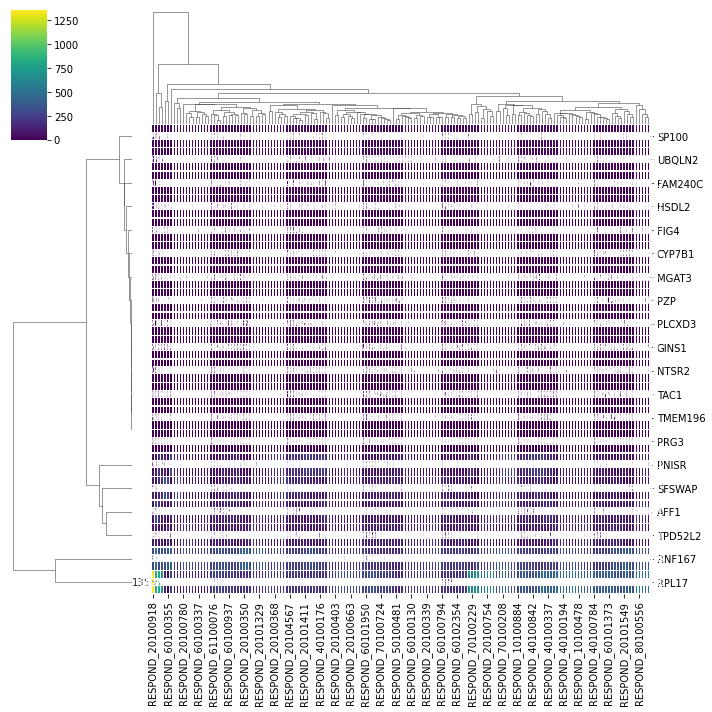

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

expression_df = expression_df.dropna()  # Remove rows with NaN values
expression_df = expression_df.replace([np.inf, -np.inf], np.nan).dropna()  # Remove rows with infinite values


expression_df_downsampled = expression_df.sample(n=20)


# Cluster the rows and columns using hierarchical clustering
clustered_df = sns.clustermap(expression_df_downsampled, method='average', cmap='viridis', annot=True, fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

In [11]:
def reformat_expression_data(df):
    # Combine column names and index names into rows for every element
    melted_df = pd.melt(df.reset_index(), id_vars=['index'], var_name='column', col_level=0)

    # Rename columns
    melted_df.rename(columns={'index': 'gene', 'column': 'sample', 'value': 'gene_expression'}, inplace=True)

    return melted_df


expression_df_melted = reformat_expression_data(expression_df)

In [142]:
filtered_expression_df

,gene,sample,gene_expression,gene_expression_log2
20001,A1BG,RESPOND_10100291,1.000000,1.000000
20002,A1CF,RESPOND_10100291,2.000000,1.584963
20003,A2M,RESPOND_10100291,106.000000,6.741467
20004,A2ML1,RESPOND_10100291,3.000000,2.000000
20005,A3GALT2,RESPOND_10100291,0.000000,0.000000
20006,A4GALT,RESPOND_10100291,55.000000,5.807355
20007,A4GNT,RESPOND_10100291,2.000000,1.584963
20008,AAAS,RESPOND_10100291,38.000000,5.285402
20009,AACS,RESPOND_10100291,139.000000,7.129283
20010,AADAC,RESPOND_10100291,0.052912,0.074385


In [144]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.2 MB/s eta 0:00:00a 0:00:01


In [141]:
def preprocess_and_combine_mutation_expression(maf_df, expression_df):
    ''' filter the expression data to those that have whole genome sequencing 
     i.e. appear in the mutation data frame (maf)
     take log2 of the expression data
     join mutation and expression data
     '''
    
    exon_seq_samples = maf_df['sample'].unique()
    filtered_expression_df = expression_df[expression_df['sample'].isin(exon_seq_samples)]
    filtered_expression_df['gene_expression_log2'] = np.log2(filtered_expression_df['gene_expression'] + 1)
    
    all_rows = expression_df.shape[0]
    filt_rows = filtered_expression_df.shape[0]
    
    percentage_filtered = (all_rows - filt_rows) / all_rows
    
    print('fraction of rows filtered is', percentage_filtered)

    express_mut_genes_df = pd.merge(maf_df, filtered_expression_df, on=['gene', 'sample'], how='right')

    express_mut_genes_df['mutation'].fillna(0, inplace=True)

    return express_mut_genes_df, filtered_expression_df


mutation_expression_df, filtered_expression_df =  preprocess_and_combine_mutation_expression(maf_df, expression_df_melted)
    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


fraction of rows filtered is 0.2865853658536585


In [13]:
def calculate_log_fold(list_mutated, list_non_mutated): 
    mean_mutated = mean(list_mutated)
    mean_non_mutated = mean(list_non_mutated) + 0.00000001
    return np.log2(mean_mutated/mean_non_mutated)

In [14]:
def calculate_pvalue_wilcox_ranksum(list_mutated, list_non_mutated):
     return ranksums(list_mutated, list_non_mutated).pvalue

In [89]:
def calculate_adjusted_pvalue(pvalues, method='fdr_bh'):
    _, corrected_pvalues, _, _ = multitest.multipletests(pvalues, method=method)
    return corrected_pvalues


In [90]:
def generate_stats_per_gene(express_mut_genes_df, target_gene):
    """
    Given expression and mutation data calculates LogFC, pvalue, mean of expression per gene 
    for a given target_gene 
    
    """
    gene_df = express_mut_genes_df[express_mut_genes_df['gene']==target_gene]

    mutated_samples = gene_df[gene_df['mutation'] == 1]['sample']
    non_mutated_samples = gene_df[gene_df['mutation'] == 0]['sample']
    
    mutated_individuals_expression = express_mut_genes_df[express_mut_genes_df['sample'].isin(mutated_samples)]
    
    non_mutated_individuals_expression = express_mut_genes_df[express_mut_genes_df['sample'].isin(non_mutated_samples)]

    # gather data of mutated and non-mutated genes into lists

    mutated_individuals_data = mutated_individuals_expression.groupby(['gene'])['gene_expression_log2'].apply(
    lambda x: list(x)).to_frame().reset_index().rename(columns={'gene_expression_log2': 'gene_expression_log2_mutated'})
    non_mutated_individuals_data = non_mutated_individuals_expression.groupby(['gene'])['gene_expression_log2'].apply(
    lambda x: list(x)).to_frame().reset_index().rename(columns={'gene_expression_log2': 'gene_expression_log2_non_mutated'})

    # combine mutated and unmutated data into one df
    combined_data= pd.merge(mutated_individuals_data, non_mutated_individuals_data, on='gene', how='inner')

    # calculate fold change and p-value

    combined_data['logFC']= combined_data.apply(
        lambda x: calculate_log_fold(x.gene_expression_log2_mutated, x.gene_expression_log2_non_mutated), axis=1)
    combined_data['pvalue'] = combined_data.apply(
        lambda x: calculate_pvalue_wilcox_ranksum(x.gene_expression_log2_mutated, x.gene_expression_log2_non_mutated), axis=1)
    combined_data['expression_log2_mutated_mean'] = combined_data['gene_expression_log2_mutated'].apply(mean)
    combined_data['expression_log2_nonmutated_mean'] = combined_data['gene_expression_log2_non_mutated'].apply(mean)
 
    # Clip outliers in 'logFC' column
    combined_data['logFC'] = combined_data['logFC'].clip(lower=-10, upper=10)

    # calculate adjusted p-value
    combined_data['adjusted_pvalue'] = calculate_adjusted_pvalue(combined_data['pvalue'].values)

    # Output data to csv 
    combined_data.drop(columns=['gene_expression_log2_mutated', 'gene_expression_log2_non_mutated'], inplace=True)
    
    output_file_path_name = f'{mutated_samples.count()}_{non_mutated_samples.count()}_{target_gene}'
    print(f"outputting data to {output_file_path_name}")
    combined_data.to_csv(output_file_path_name, index=False)

    return combined_data, output_file_path_name


In [91]:
volcano_plot_df, gene_file_path= generate_stats_per_gene(mutation_expression_df, target_gene)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.


outputting data to 5_112_RPL10


In [97]:
volcano_plot_df.head(4)

,gene,logFC,pvalue,expression_log2_mutated_mean,expression_log2_nonmutated_mean,adjusted_pvalue
0,A1BG,-0.357606,0.526496,1.796602,2.301983,0.996941
1,A1CF,0.419188,0.589864,0.770841,0.576470,0.996941
2,A2M,-0.058985,0.496169,7.180720,7.480391,0.996941
3,A2ML1,0.544969,0.140050,1.805403,1.237434,0.996941


In [104]:
def histogram_of_column(df, column):
    # Plot the distribution of p-values
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, color='blue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel('P-values')
    plt.ylabel('Frequency')
    plt.show()

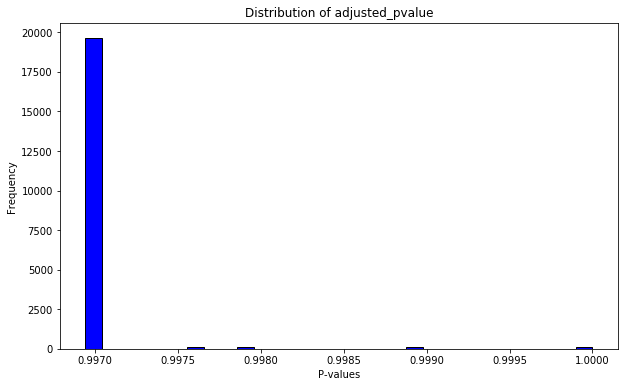

In [125]:
histogram_of_column(volcano_plot_df, column='adjusted_pvalue')

In [118]:
def volcano_plot(file_path, yaxis, xaxis):
    df = pd.read_csv(file_path)
    plt.scatter(x=df[xaxis],y=df[yaxis].apply(lambda x:-np.log10(x)),s=1)

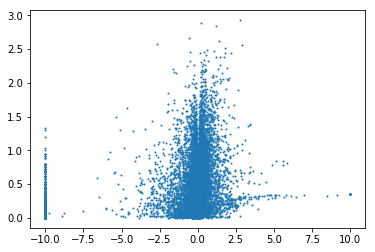

In [126]:
volcano_plot('5_112_RPL10', yaxis='pvalue', xaxis='logFC')